## Unidad 2:

### Cálculo Numérico

- Diferenciación.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from timeit import timeit
from sympy import *

from warnings import filterwarnings
filterwarnings('ignore')

plt.style.use('Solarize_Light2')

**1.** En un cirtcuito con un voltaje de  y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación
$$\epsilon(t)=L\frac{di}{dt}+Ri$$

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

$$t = 1.00, 1.01, 1.02, 1.03, 1.0$$

$$i = 3.10, 3.12, 3.14, 3.18, 3.24$$

donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 , para ello realice lo siguiente:

**A** Construya un data frame de pandas con los valores de tiempo y corriente

**B** Emplee un metodo calcular la derivada numérica.

**C** Use la ley de kirshhoff para encontrar $\epsilon$

In [10]:
# A) data frame de pandas con los valores de tiempo y corriente
t = [1, 1.01, 1.02, 1.03, 1.04] #segundos
i = [3.10, 3.12, 3.14, 3.18, 3.24] #amperes
L = 0.98 #henrios
R = 0.142 #ohms

data = pd.DataFrame({'tiempo(s)': t, 'corriente(A)': i})
data.head(3)

,tiempo(s),corriente(A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14


In [11]:
# B) Método calcular la derivada numérica.

def derivada_discreta(x,y):
  dy=[]
  for i in range(1,len(x)):
    d=(y[i]-y[i-1])/(x[i]-x[i-1])
    dy.append(d)
  return dy

derivada = derivada_discreta(data['tiempo(s)'], data['corriente(A)'])
derivada.append(derivada[-1]) #agregar el último valor
derivada

[2.0, 2.0, 4.0, 6.0, 6.0]

In [12]:
# C) Ley de kirchhoff para encontrar e(t)
e = L * np.array(derivada) + R * np.array(data['corriente(A)'])
print(e)

[2.4002  2.40304 4.36588 6.33156 6.34008]


**2.** Supongamos que tienes una muestra de material radiactivo y deseas determinar la velocidad a la que disminuye la cantidad de material radioactivo en función del tiempo. El decaimiento radioactivo sigue una ley exponencial y se puede describir mediante la siguiente ecuación:

$$N(t)=N_0e^{-\lambda t}$$

Donde:

$N(t)$ es la cantidad de material radioactivo en el tiempo $t$

$N_0$ es la cantidad inicial de material radioactivo.

$\lambda$ es una constante de decaimiento

$t$ es el tiempo

Para encontrar la tasa de cambio de $N(t)$ con respecto al tiempo $t$, es decir, la velocidad de decaimiento radioactivo, puedes calcular la derivada de $N(t)$ con respecto a $t$:

**A** Encuentre la velocidad de decaimiento usando la libreria simbololica, luego paselo a una libreria numerica y grafique.

**B** Encuentre la velocidad de decaimiento, usando la aproximación de la derivada y grafique.

tome $λ=10^{-10}$ y $N_0=6.7x10^{21}$

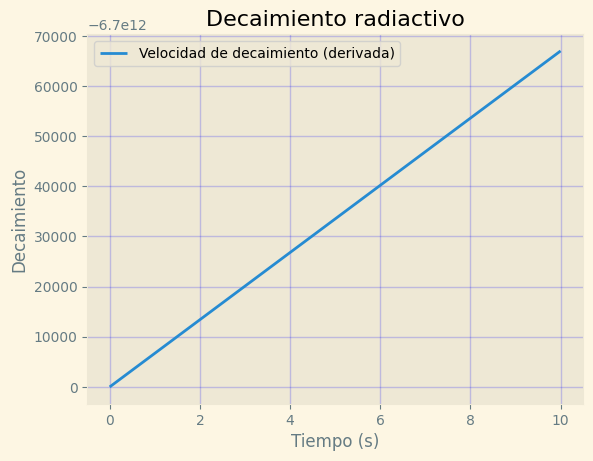

Función de decaimiento radiactivo: 6.7e+21*exp(-1.0e-9*t)
Derivada de la función de decaimiento radiactivo: -6700000000000.0*exp(-1.0e-9*t)


In [13]:
# Velocidad de decaimiento simbololica y numerica y gráfica
t = symbols('t')
N_0 = 6.7e21
lambda_ = 10e-10
# Forma simbolica del decaimiento radiactivo
decaimiento = N_0 * exp(-lambda_ * t)

# Derivada simbolica del decaimiento radiactivo
decaimiento_derivada = diff(decaimiento, t)

# Forma numérica de la derivada
decaimiento_num = lambdify(t, decaimiento_derivada, modules=['numpy'])

# Gráfica del decaimiento radiactivo
t_nuevo = np.linspace(0, 10, 100)
plt.plot(t_nuevo, decaimiento_num(t_nuevo), label='Velocidad de decaimiento (derivada)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Decaimiento')
plt.title('Decaimiento radiactivo')
plt.grid(True, alpha=0.2, color='b')
plt.legend()
plt.show()

print(f'Función de decaimiento radiactivo: {decaimiento}')
print(f'Derivada de la función de decaimiento radiactivo: {decaimiento_derivada}')

**3.** Imagina un péndulo simple (una masa suspendida en un hilo) que oscila de un lado a otro. Quieres determinar cómo cambia la aceleración de la masa en función del tiempo durante su oscilación. La aceleración del péndulo en función del ángulo de desplazamiento

θ se puede describir mediante la siguiente ecuación:

$$\frac{d^2θ}{dt^2}+\frac{g}{L}sin(θ)=0$$

$t$ = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

$θ$ = [  0,   9.6,  18.2,  24.9,28.9,  29.9,  27.7,  22.6,15.1,   6.0,  -3.7, -13.0,-21.0, -26.8, -29.7, -29.4,-26.1 , -20.0, -11.7,  -2.,7.4])

**A** Grafique la posicion vs el tiempo.

**B** calcule la primera derivada y grafique.

**C** Calcule la segunda derivada y grafique.

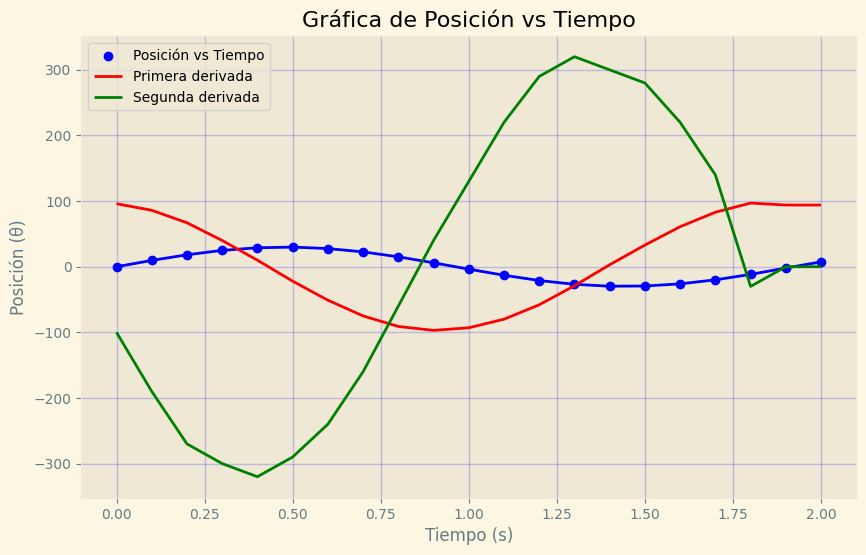

In [14]:
# Definición de las variables t y θ
t = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
θ = [0, 9.6, 18.2, 24.9, 28.9, 29.9, 27.7, 22.6, 15.1, 6.0, -3.7, -13.0, -21.0, -26.8, -29.7, -29.4, -26.1, -20.0, -11.7, -2.0, 7.4]

# Derivada discreta
def derivada(x, y):
    dy = []
    for i in range(1, len(x)):
        d = (y[i] - y[i-1]) / (x[i] - x[i-1])
        dy.append(d)
    dy.insert(-1, dy[-1])
    return dy

# Calculando priera derivada
primera_derivada = derivada(t, θ)

# Segunda derivada
segunda_derivada = derivada(t, primera_derivada)

plt.figure(figsize=(10,6))
plt.scatter(t, θ, label='Posición vs Tiempo', color='blue')
plt.plot(t, θ, color='blue')
plt.plot(t, primera_derivada, label='Primera derivada', color='red')
plt.plot(t, segunda_derivada, label='Segunda derivada', color='green')
plt.title('Gráfica de Posición vs Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (θ)')
plt.grid(True, alpha=0.2, color='b')
plt.legend()
plt.show()

**4** Repita el ejercicio anterior, pero ahora usando la libreria scipy.

**5** Plantee y resuelva un ejercicio donde use métodos de derivada numérica en Python.

Analizando el tiempo que se tarda en calcular los tres métodos para cálculos de derivadas, (`centrada`, `atrás` y `adelante`), con un conjunto de datos de longitud 100_000 para la función $e^x$.

Tiempo promedio centrada:  0.27284624000021723
Tiempo promedio adelante:  0.24832034000137354
Tiempo promedio atrás:  0.2538780000002589


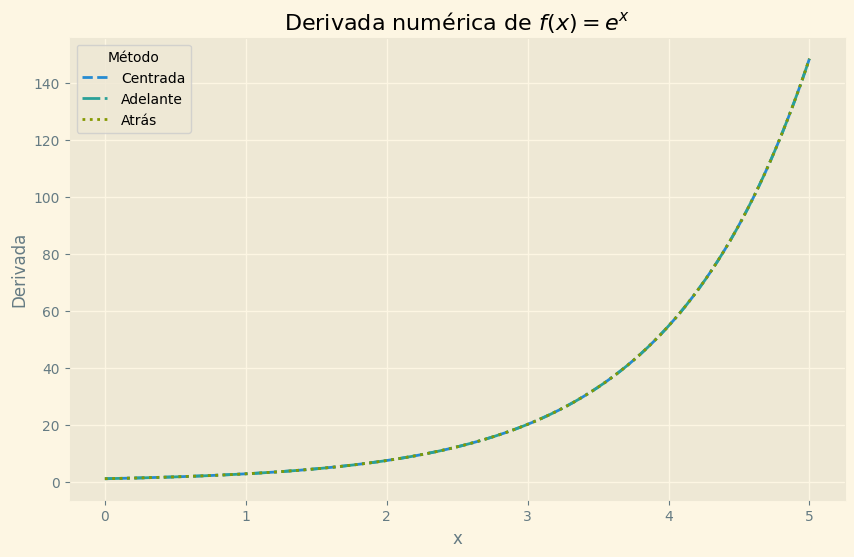

In [17]:
# función exponencial
def f(x):
    return np.exp(x)

# Definición de la función derivada
def derivative(f, a, method='centrada', h=1e-5):
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'adelante':
        return (f(a + h) - f(a))/h
    elif method == 'atras':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atras'.")

x = np.linspace(0, 5, 100_000)

# Cálculo y tiempo de la derivada centrada
t_centrada = timeit(lambda: [derivative(f, i, method='centrada') for i in x], number=10)
print("Tiempo promedio centrada: ", t_centrada / 10)

# Cálculo y tiempo de la derivada adelante
t_adelante = timeit(lambda: [derivative(f, i, method='adelante') for i in x], number=10)
print("Tiempo promedio adelante: ", t_adelante / 10)

# Cálculo y tiempo de la derivada atrás
t_atras = timeit(lambda: [derivative(f, i, method='atras') for i in x], number=10)
print("Tiempo promedio atrás: ", t_atras / 10)

# Gráfica de las derivadas
plt.figure(figsize=(10,6))
plt.plot(x, [derivative(f, i, method='centrada') for i in x], label='Centrada', linestyle='--')
plt.plot(x, [derivative(f, i, method='adelante') for i in x], label='Adelante', linestyle='-.')
plt.plot(x, [derivative(f, i, method='atras') for i in x], label='Atrás', linestyle=':')
plt.legend(title='Método')
plt.title('Derivada numérica de $f(x) = e^x$')
plt.xlabel('x')
plt.ylabel('Derivada')
plt.show()

Del análisis se ve que la derivada centrada es la que más toma tiempo y la de adelante es la más rápida.